D: 2025241 #####

In [1]:
# Importing the libraries needed to the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plots
%matplotlib inline

In [2]:
# Loading the dataset
df = pd.read_csv("spambase_v5.csv")

In [3]:
# Checking first few rows
df.head()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


In [4]:
# Basic info about dataset (Total of rows and columns)
df.shape

(4601, 59)

In [5]:
# Data types and non-null count
df.info() # This help me to identify columns with missing values or incorrect types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4601 non-null   int64  
 1   word_freq_make              4601 non-null   float64
 2   word_freq_address           4601 non-null   float64
 3   word_freq_all               4595 non-null   float64
 4   word_freq_3d                4599 non-null   object 
 5   word_freq_our               4601 non-null   object 
 6   word_freq_over              4600 non-null   float64
 7   word_freq_remove            4601 non-null   float64
 8   word_freq_internet          4586 non-null   float64
 9   word_freq_order             4601 non-null   float64
 10  word_freq_mail              4601 non-null   float64
 11  word_freq_receive           4601 non-null   float64
 12  word_freq_will              4601 non-null   object 
 13  word_freq_people            4601 

In [11]:
# Statistics resume for numeric features
df.describe() # To take insights into distribution, mean, std, etc.

,word_freq_make,word_freq_address,word_freq_all,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_people,...,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_total
count,4601.000000,4601.000000,4595.000000,4600.000000,4601.000000,4586.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4561.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.281023,0.095922,0.114208,0.105639,0.090067,0.239413,0.059824,0.093930,...,0.005472,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,283.289285
std,0.305358,1.290575,0.504370,0.273850,0.391441,0.401682,0.278616,0.644755,0.201545,0.301036,...,0.076596,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,266.000000
max,4.540000,14.280000,5.100000,5.880000,7.270000,11.110000,5.260000,18.180000,2.610000,5.550000,...,2.170000,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,15841.000000


In [7]:
# Checking for missing values
df.isnull().sum() #To see if we need do cleaning steps later

Unnamed: 0                      0
word_freq_make                  0
word_freq_address               0
word_freq_all                   6
word_freq_3d                    2
word_freq_our                   0
word_freq_over                  1
word_freq_remove                0
word_freq_internet             15
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             9
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650                   0
word_freq_lab 

In [8]:
# Checking how many columns are not float (for example: incorrect type)
df.dtypes.value_counts()

float64    49
object      7
int64       2
bool        1
dtype: int64

In [9]:
# Class balance (spam vs. not spam)
df['is_spam'].value_counts(normalize=True) * 100

False    60.595523
True     39.404477
Name: is_spam, dtype: float64

In [10]:
# Drop unnecessary index column
df.drop(columns=["Unnamed: 0"], inplace=True) # Dropping just unnecessary columns which has no analytical value
df.shape 

(4601, 58)

In [12]:
# Convert columns with object type to numeric if possible
# This is to fix cases where numbers were wrongly interpreted as text
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [13]:
# Check again for missing values created during type conversion
df.isnull().sum().sort_values(ascending=False).head(10)  # It helps decide the cleanup method

word_freq_labs                251
word_freq_table                40
word_freq_internet             15
word_freq_cs                   14
word_freq_addresses             9
word_freq_all                   6
word_freq_direct                3
word_freq_3d                    3
capital_run_length_longest      3
word_freq_hpl                   1
dtype: int64

In [14]:
# Drop rows with missing values for simplicity in this case
df.dropna(inplace=True)
# Confirm that all columns now have appropriate types and no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4270 entries, 250 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4270 non-null   float64
 1   word_freq_address           4270 non-null   float64
 2   word_freq_all               4270 non-null   float64
 3   word_freq_3d                4270 non-null   float64
 4   word_freq_our               4270 non-null   float64
 5   word_freq_over              4270 non-null   float64
 6   word_freq_remove            4270 non-null   float64
 7   word_freq_internet          4270 non-null   float64
 8   word_freq_order             4270 non-null   float64
 9   word_freq_mail              4270 non-null   float64
 10  word_freq_receive           4270 non-null   float64
 11  word_freq_will              4270 non-null   float64
 12  word_freq_people            4270 non-null   float64
 13  word_freq_report            427

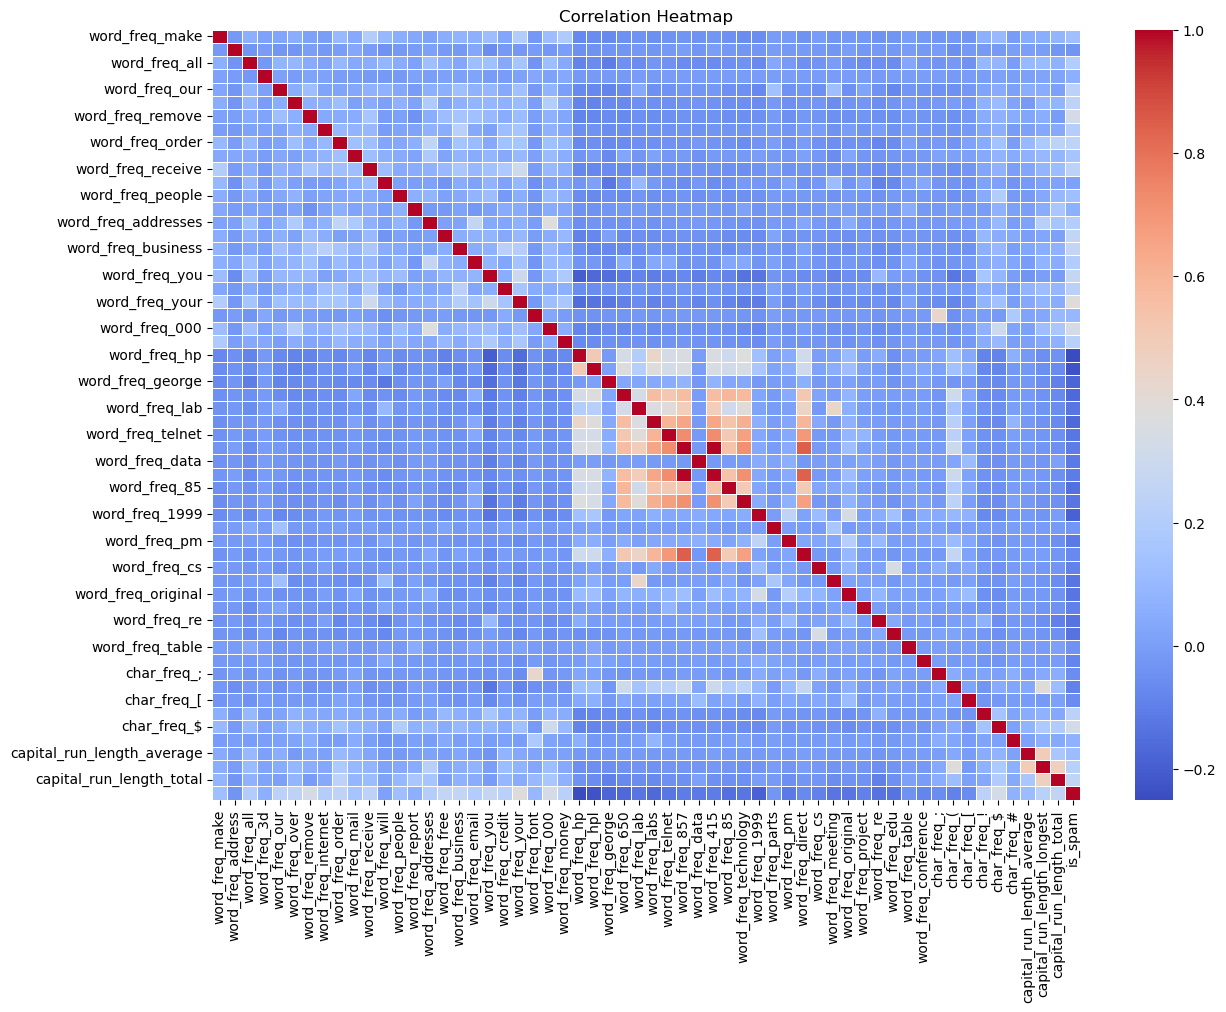

In [15]:
# Correlation Analysis

# Lets plot a correlation matrix to see how features relate to each other and to the target
plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# Identifying top 10 features most correlated with the target variable (is_spam)
corr_target = corr["is_spam"].drop("is_spam").abs().sort_values(ascending=False)
corr_target.head(10)  # Helps select influential features

word_freq_your              0.382799
word_freq_000               0.335707
word_freq_remove            0.333364
char_freq_$                 0.330180
word_freq_you               0.272408
word_freq_business          0.263067
word_freq_free              0.258235
capital_run_length_total    0.256280
word_freq_hp                0.249580
word_freq_order             0.245794
Name: is_spam, dtype: float64

In [17]:
# Feature Scaling

# Normalizibg features to zero mean and unit variance
# This is important for models that are sensitive to feature scale (e.g., PCA)
from sklearn.preprocessing import StandardScaler

# Separating features and target
X = df.drop("is_spam", axis=1)
y = df["is_spam"]

# Applying standard scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)